In [10]:
import sys
pscfpath='/Users/keceli/soft/matrix/QETSc/pscf/'
sys.path.insert(1,pscfpath)
import petsctools as pt

import slepctools as st
import numpy as np

In [5]:
import ipyparallel as ipp

def mpi_example():
    from mpi4py import MPI
    comm = MPI.COMM_WORLD
    return f"Hello World from rank {comm.Get_rank()}. total ranks={comm.Get_size()}"

# request an MPI cluster with 4 engines
with ipp.Cluster(engines='mpi', n=4) as rc:
    # get a broadcast_view on the cluster which is best
    # suited for MPI style computation
    view = rc.broadcast_view()
    # run the mpi_example function on all engines in parallel
    r = view.apply_sync(mpi_example)
    # Retrieve and print the result from the engines
    print("\n".join(r))

Starting 4 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>


  0%|          | 0/4 [00:00<?, ?engine/s]

Hello World from rank 0. total ranks=4
Hello World from rank 1. total ranks=4
Hello World from rank 2. total ranks=4
Hello World from rank 3. total ranks=4
Stopping engine(s): 1659824093
engine set stopped 1659824093: {'exit_code': 1, 'pid': 29682, 'identifier': 'ipengine-1659824092-j7oa-1659824093-6634'}
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 29664, 'identifier': 'ipcontroller-1659824092-j7oa-6634'}


In [ ]:
%px print('hi')

In [1]:
import ipyparallel as ipp
rc = ipp.Client()

Waiting for connection file: ~/.ipython/profile_default/security/ipcontroller-client.json


OSError: Connection file '~/.ipython/profile_default/security/ipcontroller-client.json' not found.
You have attempted to connect to an IPython Cluster but no Controller could be found.
Please double-check your configuration and ensure that a cluster is running.

In [10]:
A = pt.getMatFromFile('/Users/keceli/soft/matrix/QETSc/qetsc/matdir/matH.bin')

In [11]:
pt.printAIJ(A)

Rank 0:  0 0 -0.50489172
Rank 0:  0 4 -6.43617e-05
Rank 0:  0 6 0.000151414
Rank 0:  0 16 -6.43617e-05
Rank 0:  0 18 -0.000151414
Rank 0:  0 20 -0.0295096087
Rank 0:  0 21 0.0413708675
Rank 0:  0 24 1.55116e-05
Rank 0:  0 25 2.9645e-06
Rank 0:  0 26 5.1346e-06
Rank 0:  0 36 1.55116e-05
Rank 0:  0 37 2.9645e-06
Rank 0:  0 38 -5.1346e-06
Rank 0:  0 40 1.55116e-05
Rank 0:  0 41 5.9289e-06
Rank 0:  0 60 1.55116e-05
Rank 0:  0 61 -5.9289e-06
Rank 0:  0 80 -0.0295096087
Rank 0:  0 81 -0.0413708675
Rank 0:  0 84 1.55116e-05
Rank 0:  0 85 -2.9645e-06
Rank 0:  0 86 5.1346e-06
Rank 0:  0 96 1.55116e-05
Rank 0:  0 97 -2.9645e-06
Rank 0:  0 98 -5.1346e-06
Rank 0:  0 100 -0.276643271
Rank 0:  0 101 0.24689197
Rank 0:  0 102 0.1425431772
Rank 0:  0 104 1.80181e-05
Rank 0:  0 105 -1.3184e-06
Rank 0:  0 106 -5.3282e-06
Rank 0:  0 116 -0.0004972257
Rank 0:  0 117 0.0002998959
Rank 0:  0 118 -0.000865725
Rank 0:  0 120 -0.0004972252
Rank 0:  0 121 0.000899687
Rank 0:  0 122 0.0001731448
Rank 0:  0 136 1

0

In [4]:
from mpi4py import MPI
comm = MPI.COMM_WORLD
msg = f"Hello World from rank {comm.Get_rank()}. total ranks={comm.Get_size()}"
print(msg)

Hello World from rank 0. total ranks=1


In [8]:
import ipyparallel as ipp

with ipp.Cluster(engines='mpi', n=4) as rc:
    # get a broadcast_view on the cluster which is best
    # suited for MPI style computation
    view = rc.broadcast_view()
    # run the mpi_example function on all engines in parallel
    #A = pt.getMatFromFile('/Users/keceli/soft/matrix/QETSc/qetsc/matdir/matH.bin')
    # Retrieve and print the result from the engines
    #pt.printAIJ(A)
    print('before:', getWorldSize())
    r = view.apply_sync(getWorldSize)
    print('after:', r)
    print('done')

Starting 4 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>


  0%|          | 0/4 [00:00<?, ?engine/s]

before: 1
after: [4, 4, 4, 4]
done
Stopping engine(s): 1659825732
engine set stopped 1659825732: {'exit_code': 1, 'pid': 31630, 'identifier': 'ipengine-1659825731-necl-1659825732-30969'}
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 31612, 'identifier': 'ipcontroller-1659825731-necl-30969'}


In [4]:
pt.getWorldSize()

1

In [7]:
def getWorldSize():
    import sys, petsc4py
    petsc4py.init(sys.argv)
    import petsc4py.PETSc as PETSc 
    return PETSc.COMM_WORLD.size

In [44]:
import scipy.io
mat = scipy.io.loadmat('/Users/keceli/soft/matrix/QETSc/qetsc/matdir/Large_Connection_Matrix_100K.mat')

In [13]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Aug  8 16:15:20 2022',
 '__version__': '1.0',
 '__globals__': [],
 'ConnectEvenToOdd_out': <57186x56715 sparse matrix of type '<class 'numpy.float64'>'
 	with 226835 stored elements in Compressed Sparse Column format>}

In [14]:
type(mat['ConnectEvenToOdd_out'])

scipy.sparse._csc.csc_matrix

In [45]:
G = mat['ConnectEvenToOdd_out']

In [46]:
G.toarray()

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [47]:
import matplotlib.pylab as plt

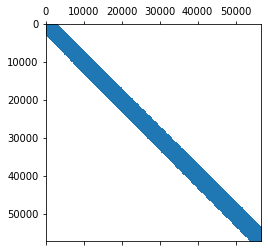

In [48]:
plt.spy(G)

In [49]:
H = scipy.sparse.bmat([[None,G],[G.transpose(),None]])

In [50]:
type(H)

scipy.sparse._coo.coo_matrix

In [51]:
A = scipy.sparse.csc_matrix([[1, 2], [3, 4]])
B = scipy.sparse.csc_matrix([[5], [6]])
C = scipy.sparse.csc_matrix([[7]])
scipy.sparse.bmat([[A, B], [None, C]]).toarray()

array([[1, 2, 5],
       [3, 4, 6],
       [0, 0, 7]])

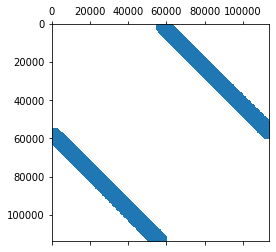

In [52]:
plt.spy(H)

In [12]:
scipy.linalg.eigvals

<function scipy.linalg._decomp.eigvals(a, b=None, overwrite_a=False, check_finite=True, homogeneous_eigvals=False)>

In [24]:
%%time
scipy.sparse.linalg.eigsh(H,k=6,return_eigenvectors=False)

CPU times: user 1min 20s, sys: 3.17 s, total: 1min 23s
Wall time: 40.9 s


array([ 4.22117228, -4.22117228,  4.22125213, -4.22125213,  4.2214871 ,
       -4.2214871 ])

In [25]:
%%time
scipy.sparse.linalg.eigsh(H,k=15,return_eigenvectors=False,sigma=4.23)

CPU times: user 4.62 s, sys: 602 ms, total: 5.22 s
Wall time: 3.19 s


array([4.21922645, 4.21925677, 4.21944182, 4.219787  , 4.21980109,
       4.22001552, 4.22012188, 4.22031584, 4.2203754 , 4.22064028,
       4.22078797, 4.22084616, 4.22117228, 4.22125213, 4.2214871 ])

In [26]:
%%time
scipy.sparse.linalg.eigsh(H,k=15,return_eigenvectors=False,sigma=-4.23)

CPU times: user 4.61 s, sys: 580 ms, total: 5.19 s
Wall time: 3.13 s


array([-4.2214871 , -4.22125213, -4.22117228, -4.22084616, -4.22078797,
       -4.22064028, -4.2203754 , -4.22031584, -4.22012188, -4.22001552,
       -4.21980109, -4.219787  , -4.21944182, -4.21925677, -4.21922645])

In [27]:
%%time
scipy.sparse.linalg.eigsh(H,k=15,return_eigenvectors=False,sigma=-2.23)

CPU times: user 4.69 s, sys: 1.33 s, total: 6.02 s
Wall time: 3.32 s


array([-2.2304935 , -2.23045697, -2.23040497, -2.23029829, -2.23025433,
       -2.23015223, -2.23004424, -2.2299841 , -2.22994993, -2.22990611,
       -2.22985635, -2.22967359, -2.22953293, -2.22945588, -2.2293969 ])

In [28]:
%%time
scipy.sparse.linalg.eigsh(H,k=15,return_eigenvectors=True,sigma=-2.23)

CPU times: user 4.84 s, sys: 1.33 s, total: 6.17 s
Wall time: 3.38 s


(array([-2.2304935 , -2.23045697, -2.23040497, -2.23029829, -2.23025433,
        -2.23015223, -2.23004424, -2.2299841 , -2.22994993, -2.22990611,
        -2.22985635, -2.22967359, -2.22953293, -2.22945588, -2.2293969 ]),
 array([[-2.16816228e-03,  2.42940320e-03, -9.54042954e-04, ...,
         -1.09166273e-04,  2.19425261e-03,  3.73140334e-03],
        [-2.10337152e-03, -1.24622885e-03, -1.00013150e-03, ...,
         -1.11697265e-03,  3.69936356e-03,  5.21845187e-03],
        [-1.59694031e-03,  1.42664926e-03, -1.21270056e-03, ...,
          9.77007253e-04,  5.05807706e-05, -6.75316524e-04],
        ...,
        [-4.92021315e-04,  3.03841037e-03,  2.21574843e-03, ...,
         -5.81825330e-04,  3.24719766e-03, -5.04985332e-03],
        [-2.13963091e-03,  3.56046526e-03,  2.29681800e-03, ...,
         -1.27163200e-03, -8.90077862e-04, -2.80014153e-04],
        [-2.78464509e-03,  2.89821060e-03,  1.39720815e-03, ...,
         -1.63482910e-03, -5.24600752e-03,  4.44711225e-03]]))

In [29]:
%%time
eigenvalues, eigenvectors = scipy.sparse.linalg.eigsh(H,k=1)

CPU times: user 1min 23s, sys: 3.35 s, total: 1min 26s
Wall time: 39.2 s


In [30]:
eigenvalues

array([-4.2214871])

In [31]:
eigenvectors

array([[ 4.41282098e-03],
       [ 4.46276358e-03],
       [ 4.41289120e-03],
       ...,
       [-1.23034218e-05],
       [-1.60044735e-05],
       [-1.11539780e-05]])

In [32]:
len(eigenvectors)

113901

In [33]:
import numpy as np

In [34]:
np.count_nonzero(eigenvectors)

113901

In [35]:
min(eigenvectors)

array([-0.01148177])

In [36]:
%%time
sigma_eigenvalues, sigma_eigenvectors = scipy.sparse.linalg.eigsh(H,k=1,sigma=4.23)

CPU times: user 2.63 s, sys: 525 ms, total: 3.16 s
Wall time: 2.14 s


In [37]:
sigma_eigenvalues- eigenvalues

array([8.4429742])

In [38]:
%%time
sigma_eigenvalues, sigma_eigenvectors = scipy.sparse.linalg.eigsh(H,k=100,sigma=4.23)

CPU times: user 39.9 s, sys: 949 ms, total: 40.9 s
Wall time: 10.9 s


In [39]:
%%time
evals = scipy.sparse.linalg.eigsh(H,k=10,sigma=4.23,return_eigenvectors=False)

CPU times: user 3.96 s, sys: 571 ms, total: 4.53 s
Wall time: 3.08 s


In [40]:
evals

array([4.22001552, 4.22012188, 4.22031584, 4.2203754 , 4.22064028,
       4.22078797, 4.22084616, 4.22117228, 4.22125213, 4.2214871 ])

In [41]:
%%time
evals2 = scipy.sparse.linalg.eigsh(H,k=10,sigma=4.2200,return_eigenvectors=False,which='LM')

CPU times: user 2.41 s, sys: 521 ms, total: 2.93 s
Wall time: 1.93 s


In [42]:
%%time
evals2 = scipy.sparse.linalg.eigsh(H,k=100,sigma=0.01,return_eigenvectors=False,which='LM')

CPU times: user 23.5 s, sys: 1.89 s, total: 25.4 s
Wall time: 9.56 s


In [43]:
evals2

array([0.00235599, 0.00245494, 0.00266402, 0.00306113, 0.00323491,
       0.00347661, 0.00398764, 0.00446126, 0.00501997, 0.00512521,
       0.00541936, 0.00587076, 0.00590915, 0.0060894 , 0.00611487,
       0.00638341, 0.00642685, 0.00655803, 0.00682409, 0.00686713,
       0.00690819, 0.00701103, 0.00721473, 0.00728048, 0.00764991,
       0.007739  , 0.00785632, 0.00804839, 0.00816174, 0.00827702,
       0.00837226, 0.00880729, 0.00895123, 0.0089827 , 0.0089869 ,
       0.00901069, 0.00920666, 0.00939731, 0.00941926, 0.00969164,
       0.00990519, 0.01012087, 0.0103214 , 0.01054988, 0.01091451,
       0.01101355, 0.011232  , 0.01143592, 0.01143667, 0.01147327,
       0.01153312, 0.01159577, 0.01164718, 0.0117148 , 0.01184349,
       0.01212916, 0.01221436, 0.01241848, 0.01255111, 0.01281169,
       0.01289919, 0.01292147, 0.01329156, 0.01343596, 0.01355908,
       0.01375984, 0.01395167, 0.01404059, 0.01426472, 0.01440463,
       0.01459933, 0.01472476, 0.01486193, 0.01501262, 0.01510

In [44]:
%%time
evals_buckling = scipy.sparse.linalg.eigsh(H,k=10,sigma=4.2200,return_eigenvectors=False,which='LM',mode='buckling')

CPU times: user 2.56 s, sys: 536 ms, total: 3.1 s
Wall time: 2.08 s


In [45]:
evals_buckling

array([4.21922645, 4.21925677, 4.21944182, 4.219787  , 4.21980109,
       4.22001552, 4.22012188, 4.22031584, 4.2203754 , 4.22064028])

In [46]:
%%time
evals_cayley = scipy.sparse.linalg.eigsh(H,k=10,sigma=4.2200,return_eigenvectors=False,which='LM',mode='cayley')
evals_cayley

CPU times: user 2.47 s, sys: 554 ms, total: 3.03 s
Wall time: 2.02 s


array([4.21922645, 4.21925677, 4.21944182, 4.219787  , 4.21980109,
       4.22001552, 4.22012188, 4.22031584, 4.2203754 , 4.22064028])

In [47]:
%%time
evals_cayley = scipy.sparse.linalg.eigsh(H,k=10,sigma=0.0001,return_eigenvectors=False,which='LM',mode='cayley')
evals_cayley

CPU times: user 7.6 s, sys: 1.66 s, total: 9.26 s
Wall time: 5.68 s


array([0.00235599, 0.00245494, 0.00266402, 0.00306113, 0.00323491,
       0.00347661, 0.00398764, 0.00446126, 0.00501997, 0.00512521])

In [48]:
%%time
evals_cayley = scipy.sparse.linalg.eigsh(H,k=100,sigma=-0.0001,return_eigenvectors=False,which='LM',mode='cayley')
evals_cayley

CPU times: user 1min 23s, sys: 2.58 s, total: 1min 26s
Wall time: 27.9 s


array([-0.01854397, -0.01821608, -0.01808094, -0.01803202, -0.01777002,
       -0.01747829, -0.0174058 , -0.01736614, -0.01731532, -0.01714767,
       -0.01711298, -0.01694407, -0.0166154 , -0.01658044, -0.01639299,
       -0.01630053, -0.01626843, -0.01614562, -0.01609307, -0.0159814 ,
       -0.01569187, -0.01566963, -0.01554948, -0.01542937, -0.01521629,
       -0.01510684, -0.01501262, -0.01486193, -0.01472476, -0.01459933,
       -0.01440463, -0.01426472, -0.01404059, -0.01395167, -0.01375984,
       -0.01355908, -0.01343596, -0.01329156, -0.01292147, -0.01289919,
       -0.01281169, -0.01255111, -0.01241848, -0.01221436, -0.01212916,
       -0.01184349, -0.0117148 , -0.01164718, -0.01159577, -0.01153312,
       -0.01147327, -0.01143667, -0.01143592, -0.011232  , -0.01101355,
       -0.01091451, -0.01054988, -0.0103214 , -0.01012087, -0.00990519,
       -0.00969164, -0.00941926, -0.00939731, -0.00920666, -0.00901069,
       -0.0089869 , -0.0089827 , -0.00895123, -0.00880729, -0.00

In [49]:
shifts = np.linspace(0.1,4.3,100)
allevals = []
for s in shifts:
  evals = scipy.sparse.linalg.eigsh(H, k=101, sigma=s, return_eigenvectors=False)
  allevals.extend(evals)

KeyboardInterrupt: 

In [ ]:
plt.hist(allevals,bins=300,density=True)

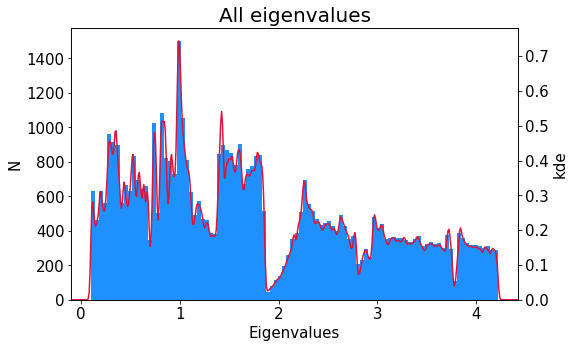

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

Eig_nn = np.loadtxt('/Users/keceli/soft/matrix/QETSc/notebook/eig0-4.m')

bins = 100
plt.rcParams.update({'font.size': 15})
fig, ax1 = plt.subplots(figsize=[8,5])
bin_values, bin_lims, _patches  = plt.hist(Eig_nn, bins, color='dodgerblue')

x = np.linspace(bin_lims[0]-0.2, bin_lims[-1]+0.2, 500) # create an x-axis
kde = gaussian_kde(Eig_nn, 0.01)
ax2 = ax1.twinx()  # create a secondary axis for the kde
ax2.plot(x, kde(x), color='crimson')

ax1.set_xlim(x[0], x[-1])  # set strict limits
ax1.set_xlabel('Eigenvalues')
ax1.set_ylabel('N')
ax2.set_ylabel('kde')
ax2.set_ylim(ymin=0) # put the zero of the secondary y-axis at the bottom
plt.title('All eigenvalues', fontsize=20)

#plt.show()
plt.savefig('spectrum.pdf')

In [7]:
import scipy
import scipy.sparse
A = scipy.sparse.csc_matrix([[1.,0,0],[0,2.,0],[0,0,3.]])

In [ ]:
scipy.sparse.linalg.eigsh(A,k=2,sigma=1.1)

In [53]:
H.setdiag(0.)
Amat = pt.convertCSR2AIJ(H)

size (113901, 113901)


In [11]:
Amat = pt.convertCSR2AIJ(A)

size (3, 3)


In [ ]:
%%time
st.get_eigenpairs(Amat,npairs=101)

In [ ]:
np.zeros([3,4])

In [25]:
pt.writeMat(Amat,filename='mat113901_w0.bin')

Writing PETSc binary matrix


0

In [ ]:
pwd

In [23]:
import numpy as np
Amat.setDiagonal(Amat.getVecLeft())

Error: error code 63
[0] MatDiagonalSet() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/petsc_174febac39a043f6a887387485e59f37/src/mat/utils/axpy.c:357
[0] MatDiagonalSet_SeqAIJ() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/petsc_174febac39a043f6a887387485e59f37/src/mat/impls/aij/seq/aij.c:205
[0] MatDiagonalSet_Default() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/petsc_174febac39a043f6a887387485e59f37/src/mat/utils/axpy.c:317
[0] MatSetValues() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/petsc_174febac39a043f6a887387485e59f37/src/mat/interface/matrix.c:1343
[0] MatSetValues_SeqAIJ() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/petsc_174febac39a043f6a887387485e59f37/src/mat/impls/aij/seq/aij.c:474
[0] Argument out of range
[0] Inserting a new nonzero at (0,0) in the matrix

In [19]:
pt.getSeqVec(np.zeros(113901))

AttributeError: 'numpy.ndarray' object has no attribute 'getSize'

In [21]:
avec = Amat.getVecLeft()

In [22]:
st.get_numpy_array(avec)

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
vec = np.loadtxt('/Users/keceli/soft/matrix/QETSc/notebook/eig0-4.m')

In [28]:
vec

array([0.10001098, 0.10003896, 0.10005313, ..., 4.22117228, 4.22125213,
       4.2214871 ])

In [ ]:
def solve(A):
    eps = SLEPc.EPS()
    eps.create()
    eps.setOperators(A)
    eps.setFromOptions() #Use command line options
    eps.setProblemType(SLEPc.EPS.ProblemType.GHEP)
    if largest:
        eps.setWhichEigenpairs(SLEPc.EPS.Which.LARGEST_REAL)
    else:
        eps.setWhichEigenpairs(SLEPc.EPS.Which.SMALLEST_REAL)
    eps.setDimensions(nev=npairs,ncv=SLEPc.DECIDE,mpd=SLEPc.DECIDE)
    eps.setTolerances(tol=1.e-14)
    eps.setFromOptions() #Use command line options
    eps.setUp()
    eps.solve()
    nconv = eps.getConverged()
    vr = A.getVecLeft()
    vi = A.getVecLeft()
    if nconv < npairs:
        Print("{} eigenvalues required, {} converged.".format(npairs,nconv))
        npairs = nconv
    evals = np.zeros(npairs)
    evecs = np.zeros((n,npairs))
    for i in range(npairs):
        k = eps.getEigenpair(i,vr,vi)
        if abs(k.imag) > 1.e-10:
            Print("Imaginary eigenvalue: {} + {}j".format(k.real,k.imag))
            Print("Error: {}".format(eps.computeError(i)))
        if mpisize > 1:
            evecs[:,i] = get_numpy_array(vr)
        else:
            evecs[:,i] = vr.getArray()
        evals[i] = k.real
    return evals, evecs  

In [1]:
import sys, petsc4py
petsc4py.init(sys.argv)
#from slepc4py import SLEPc
#eps = SLEPc.EPS()
#eps.

In [1]:
import sys, slepc4py
slepc4py.init(sys.argv)

In [2]:
from petsc4py import PETSc
from slepc4py import SLEPc
import numpy

In [3]:
opts = PETSc.Options()
n = opts.getInt('n', 30)

In [4]:
A = PETSc.Mat().create()
A.setSizes([n, n])
A.setFromOptions()
A.setUp()

rstart, rend = A.getOwnershipRange()

# first row
if rstart == 0:
    A[0, :2] = [2, -1]
    rstart += 1
# last row
if rend == n:
    A[n-1, -2:] = [-1, 2]
    rend -= 1
# other rows
for i in range(rstart, rend):
    A[i, i-1:i+2] = [-1, 2, -1]

A.assemble()

In [54]:
eps = SLEPc.EPS(); eps.create()

In [55]:
eps.setOperators(Amat)
eps.setFromOptions()
eps.setProblemType(SLEPc.EPS.ProblemType.GHEP)
eps.setInterval(0.9,1.3)
eps.setWhichEigenpairs(SLEPc.EPS.Which.ALL)
eps.setType(SLEPc.EPS.Type.KRYLOVSCHUR)
st = eps.getST()
st.setType(SLEPc.ST.Type.SINVERT)
ksp = eps.getKrylovSchurKSP()
ksp.setType('preonly')
pc = ksp.getPC()
pc.setType('cholesky')
eps.setUp()
eps.getKrylovSchurInertias()

(array([0.9, 1.3]), array([76780, 84100], dtype=int32))

In [86]:
eps.setInterval(0.00001,0.01)
eps.setUp()


In [87]:
eps.getKrylovSchurInertias()

(array([1.e-05, 1.e-02]), array([61894, 61935], dtype=int32))

In [76]:
61894-52007

9887

In [77]:
eps.solve()

Error: error code 71
[0] EPSSolve() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/slepc_3fd257ea017e4ad5b57082d3111a5bbf/src/eps/interface/epssolve.c:147
[0] EPSSolve_KrylovSchur_Slice() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/slepc_3fd257ea017e4ad5b57082d3111a5bbf/src/eps/impls/krylov/krylovschur/ks-slice.c:1229
[0] EPSSolve_KrylovSchur_Slice() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/slepc_3fd257ea017e4ad5b57082d3111a5bbf/src/eps/impls/krylov/krylovschur/ks-slice.c:1311
[0] EPSExtractShift() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/slepc_3fd257ea017e4ad5b57082d3111a5bbf/src/eps/impls/krylov/krylovschur/ks-slice.c:812
[0] EPSSliceGetInertia() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/slepc_3fd257ea017e4ad5b57082d3111a5bbf/src/eps/impls/krylov/krylovschur/ks-slice.c:250
[0] STSetShift() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/slepc_3fd257ea017e4ad5b57082d3111a5bbf/src/sys/classes/st/interface/stfunc.c:661
[0] STSetShift_Sinvert() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/slepc_3fd257ea017e4ad5b57082d3111a5bbf/src/sys/classes/st/impls/sinvert/sinvert.c:146
[0] KSPSetUp() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/petsc_174febac39a043f6a887387485e59f37/src/ksp/ksp/interface/itfunc.c:407
[0] PCSetUp() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/petsc_174febac39a043f6a887387485e59f37/src/ksp/pc/interface/precon.c:990
[0] PCSetUp_Cholesky() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/petsc_174febac39a043f6a887387485e59f37/src/ksp/pc/impls/factor/cholesky/cholesky.c:127
[0] MatCholeskyFactorNumeric() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/petsc_174febac39a043f6a887387485e59f37/src/mat/interface/matrix.c:3191
[0] MatCholeskyFactorNumeric_SeqAIJ() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/petsc_174febac39a043f6a887387485e59f37/src/mat/impls/aij/seq/aijfact.c:2133
[0] MatPivotCheck() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/petsc_174febac39a043f6a887387485e59f37/include/petsc/private/matimpl.h:822
[0] MatPivotCheck_none() at /private/var/folders/mq/0srbmfhn5ln97698q286rnzw0000gn/T/pip-install-02m3jqgr/petsc_174febac39a043f6a887387485e59f37/include/petsc/private/matimpl.h:803
[0] Zero pivot in LU factorization: https://petsc.org/release/faq/#zeropivot
[0] Zero pivot row 17840 value 0. tolerance 2.22045e-14

In [40]:
nconv = eps.getConverged()
Print = PETSc.Sys.Print


In [41]:
E=eps
Print()
Print("******************************")
Print("*** SLEPc Solution Results ***")
Print("******************************")
Print()

its = E.getIterationNumber()
Print("Number of iterations of the method: %d" % its)

eps_type = E.getType()
Print("Solution method: %s" % eps_type)

nev, ncv, mpd = E.getDimensions()
Print("Number of requested eigenvalues: %d" % nev)

tol, maxit = E.getTolerances()
Print("Stopping condition: tol=%.4g, maxit=%d" % (tol, maxit))


******************************
*** SLEPc Solution Results ***
******************************

Number of iterations of the method: 1
Solution method: krylovschur
Number of requested eigenvalues: 3
Stopping condition: tol=1e-10, maxit=100


In [42]:
if nconv > 0:
    # Create the results vectors
    vr, wr = Amat.getVecs()
    vi, wi = Amat.getVecs()
    #
    Print()
    Print("        k          ||Ax-kx||/||kx|| ")
    Print("----------------- ------------------")
    for i in range(nconv):
        k = E.getEigenpair(i, vr, vi)
        error = E.computeError(i)
        if k.imag != 0.0:
            Print(" %9f%+9f j %12g" % (k.real, k.imag, error))
        else:
            Print(" %12f      %12g" % (k.real, error))
    Print()


        k          ||Ax-kx||/||kx|| 
----------------- ------------------
     1.000000       4.33681e-16
     2.000000       4.96752e-16
     3.000000       7.45909e-17



In [43]:
eps.getKrylovSchurInertias()

(array([0.9, 3.1]), array([0, 3], dtype=int32))